## The Presence of Heart Disease

**Introduction:**

Heart disease is a leading cause of death in the world. Risk of heart disease can be influenced by many factors.

**Can we use the age, heart rate, and cholesterol of an individual to predict whether or not they have heart disease?**
 
 
This dataset shows information about individuals that could contribute to heart disease and whether or not those individuals have heart disease. POHD indicates the presence of heart disease in an individual. POHD is valued from 0 (no presence) to 4, values 1 through 4 all indicate presence. 


In [1]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:

#We have read in and combined all datasets and tidied the data. 
#The NAs in the datasets are replaced with question marks.

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
hungary_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
switzerland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
va_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

cleveland_data <- read_csv(cleveland_url, col_names = FALSE, na = "?")
hungary_data <- read_csv(hungary_url, col_names = FALSE, na = "?")
switzerland_data <- read_csv(switzerland_url, col_names = FALSE, na = "?")
va_data <- read_csv(va_url, col_names = FALSE, na = "?")

heart_disease_data1 <- full_join(cleveland_data, hungary_data) %>%
    full_join(switzerland_data) %>%
    full_join(va_data)

colnames(heart_disease_data1) <- c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD")

head(heart_disease_data1)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
 

Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [3]:
POHD2 <- mutate(heart_disease_data1, Presence_of_Heart_Disease = ifelse(POHD>0, "Positive", "Negative"))

#select for desired columns
heart_data <- POHD2 %>%
                    select(Age, chest_pain_type, serum_cholestoral, Presence_of_Heart_Disease, resting_blood_pressure, maximum_heart_rate) 
#remove NAs
heart_disease_data1 <- na.omit(heart_data)
heart_disease_data1

Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
63,1,233,Negative,145,150
67,4,286,Positive,160,108
67,4,229,Positive,120,129
⋮,⋮,⋮,⋮,⋮,⋮
54,4,333,Positive,127,154
55,4,223,Positive,122,100
62,2,254,Positive,120,93


POHD has been mutated because the purpose of this dataset is simply to distinguish presence from lack of presence. Data has been tidied.

In [4]:
set.seed(1234)

heart_disease_split <- initial_split(heart_disease_data1, prop = 0.70, strata = Presence_of_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train

Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
63,1,233,Negative,145,150
67,4,286,Positive,160,108
67,4,229,Positive,120,129
⋮,⋮,⋮,⋮,⋮,⋮
46,4,310,Positive,134,126
54,4,333,Positive,127,154
55,4,223,Positive,122,100


In [5]:
#useful Tables 

summerized_POHD <- heart_disease_train %>%
    group_by(Presence_of_Heart_Disease) %>%
    summarize("Number of variable"= n())

mean_variables <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestoral),
                           "Mean Chest Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure), 
                           "Mean maximum heart rate" = mean(maximum_heart_rate)) 
summerized_POHD
mean_variables

`summarise()` ungrouping output (override with `.groups` argument)



Presence_of_Heart_Disease,Number of variable
<chr>,<int>
Negative,262
Positive,323


Mean Age,Mean serum cholestoral,Mean Chest Pain Type,Mean Resting Blood Pressure,Mean maximum heart rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.78291,197.2325,3.261538,131.3744,137.9812


The first table shows the number of rows that correspond to positive and negative POHD values. We can use this to see that we have similar numbers of positive and negative values for heart disease presence. The second table shows the mean values of our predictors. 

In [6]:
#scaled Data 
heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestoral + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 


Warning message:
“Removed 12 rows containing missing values (geom_bar).”


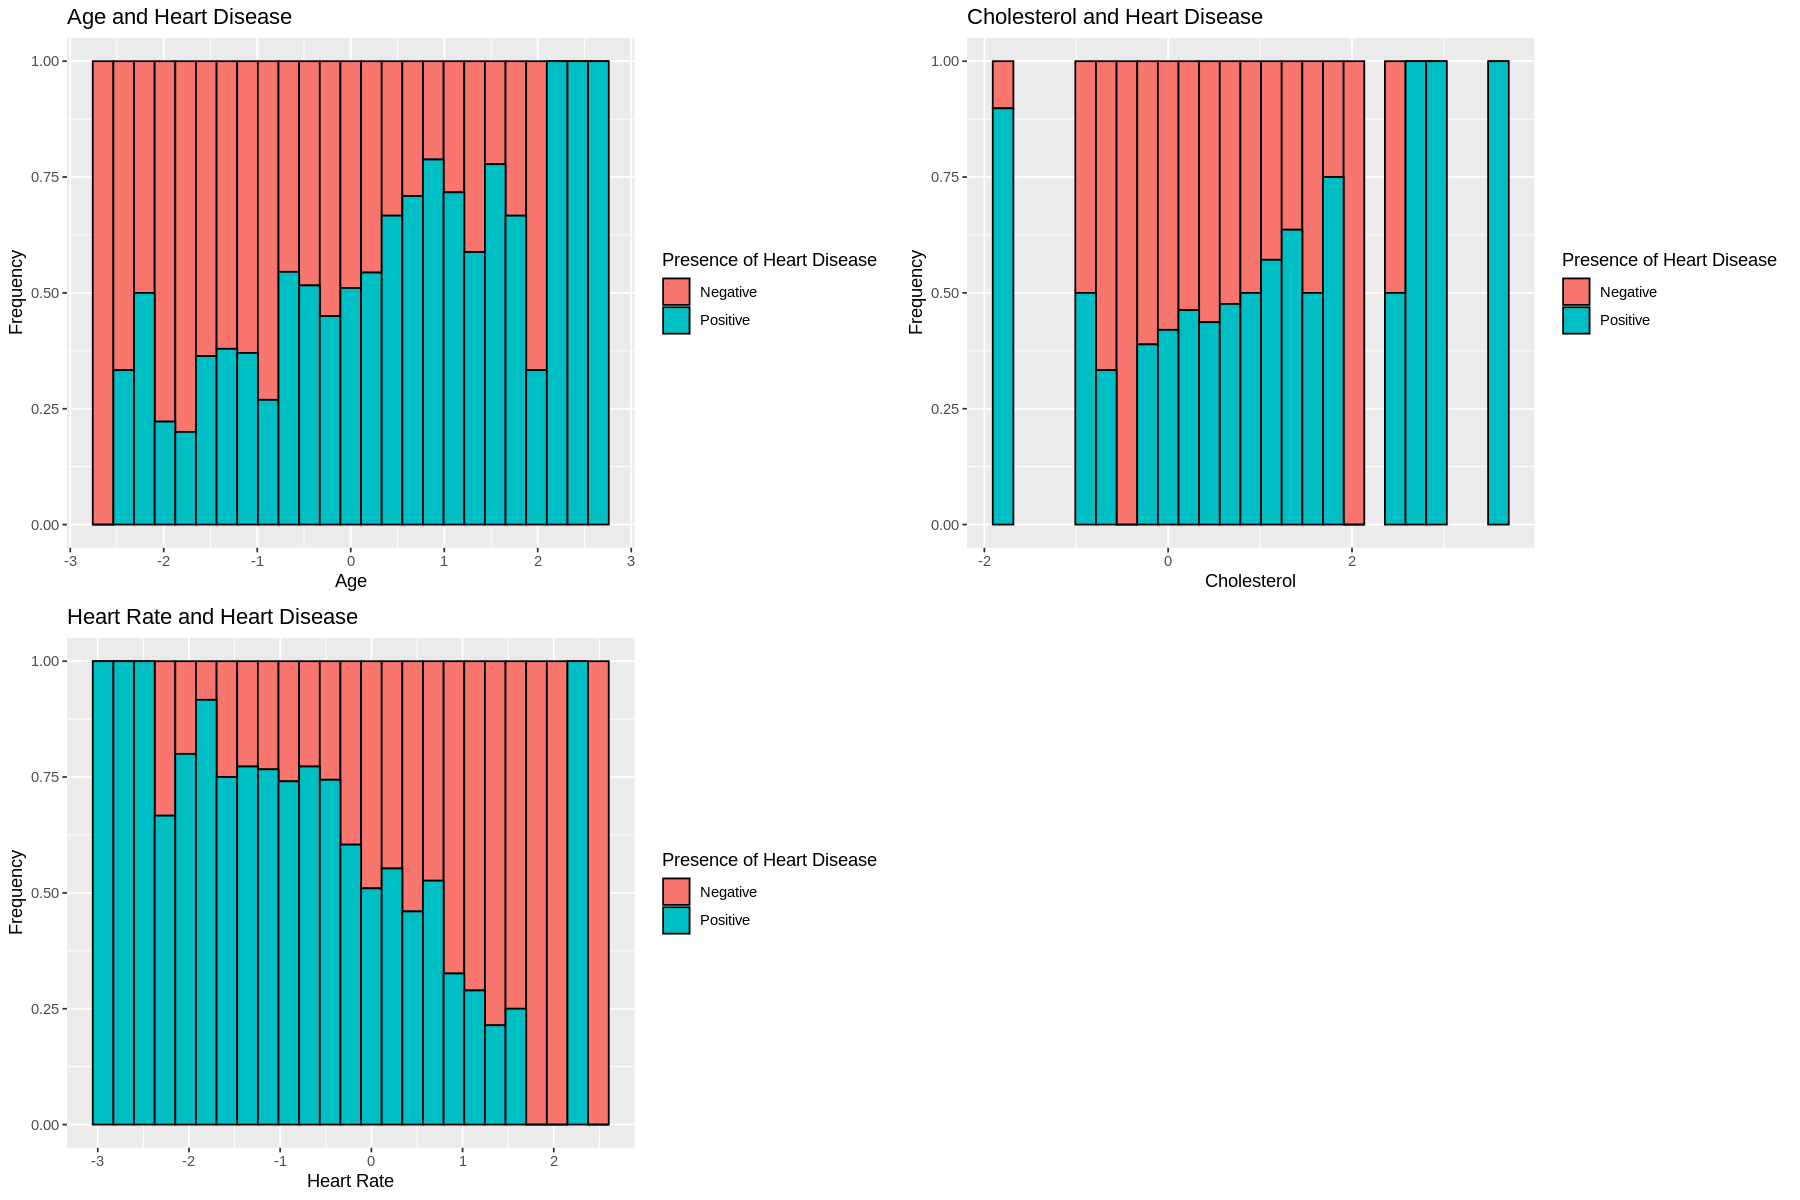

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)

plot_a <- heart_disease_scaled %>%
   ggplot(aes(x = Age, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Age") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Age and Heart Disease") 

plot_b <- heart_disease_scaled %>%
   ggplot(aes(x = serum_cholestoral, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Cholesterol") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Cholesterol and Heart Disease") 

plot_c <- heart_disease_scaled %>%
   ggplot(aes(x = maximum_heart_rate, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Heart Rate") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Heart Rate and Heart Disease") 

plot_grid(plot_a, plot_b, plot_c)

**Methods:**

We will be using classification for this data analysis. We have already standardized the data by centering and scaling it. Next we will create the K-nearest neighbour model specification, then we will create a new recipe that centres and scales the predictors, using all predictors. We will combine this with the first recipe in a workflow and fit it to the dataset. 
We will then perform a cross-validation on the training data, create a workflow analysis with our recipe and model specification, collect metrics from the workflow analysis, and plot the k vs the accuracy to find the best value of k to maximize accuracy. 
Then we will build our final model with the predetermined best value for k, pass the model specification and the training data set to the fit() function, use our final model to predict on the test dataset, and report the confusion matrix.

We are using the columns Age, Chest pain type, Serum Cholesterol, Resting blood pressure, and POHD. 

Histograms are used to visualize our data. These graphs show the relationship between our predictors and presence of heart disease. This lets us clearly see how each predictor impacts risk of heart disease. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age,  and heart rate are good predictors.


**Expected Outcomes and Significance:**

We expect to find out how well our predictors can determine whether or not an individual has heart disease. Our findings could help determine what factors correlate to higher risk of heart disease, allowing for earlier prevention and treatment for factors that increase risk of heart disease. This could lead us to question how big of a role genetics plays in the development of heart disease as well as how other factors, such as drug use and obesity could impact risk of developing heart disease.
